In [1]:
import requests
import apimoex
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_tickets(ticket : str):
    with requests.Session() as session:
        data = apimoex.get_board_history(session, ticket)
        df = pd.DataFrame(data)  # Прямое преобразование
        df = df[['TRADEDATE', 'CLOSE']]
        df.columns = ['Date', 'Close']
    return df

In [3]:
tickets = ['CHMF', 'PLZL', 'MAGN', 'ROSN', 'TATN', 'GAZP', 'NVTK', 'LKOH', 'MGNT', 'SBER', 'MTSS', 'YNDX', 'SNGS', 'NLMK', 'GMKN', 'T', 'POLY', 'X5', 'VKCO']

In [4]:
for i in tickets:
    data = load_tickets(i)
    data.to_csv(f"datasets/{i}.csv", index=False)

In [5]:
df = pd.read_csv('datasets/SBER.csv')
df.tail(20)

,Date,Close
3024,2025-03-17,326.02
3025,2025-03-18,324.06
3026,2025-03-19,325.30
3027,2025-03-20,324.05
3028,2025-03-21,323.26
3029,2025-03-24,319.47
3030,2025-03-25,319.80
3031,2025-03-26,315.23
3032,2025-03-27,311.96
3033,2025-03-28,308.04


In [6]:
# def proverka_isna(ticket, df):
#     num_empty = df['Close'].isna().sum()
#     print(f"Количество пустых значений {ticket}: {num_empty}")  

In [7]:
# for i in tickets:
#     df = pd.read_csv(f"datasets/{i}.csv")
#     proverka_isna(i, df)

In [10]:
ticker_dict = {
    'CHMF': 'Северсталь',
    'PLZL': 'Полюс Золото',
    'MAGN': 'Магнитогроск.мет.комб',
    'ROSN': 'Роснефть',
    'TATN': 'Татнефть',
    'GAZP': 'Газпром',
    'NVTK': 'Новатэк',
    'LKOH': 'Лукойл',
    'MGNT': 'Магнит',
    'SBER': 'СберБанк',
    'MTSS': 'МТС',
    'YNDX': 'Яндекс',
    'SNGS': 'Сургутнефтегаз',
    'NLMK': 'Новолипец.метал.комб.',
    'GMKN': 'Норникель',
    'T': 'Тинькофф',
    'POLY': 'Полиметалл',
    'X5': 'X5 Group',
    'VKCO': 'Вконтакте' 
}

In [11]:
def make_figure(df, i):
    df['Date'] = pd.to_datetime(df['Date'])
    
    company_name = ticker_dict.get(i)
    
    # Создаем график
    plt.figure(figsize=(10, 5))  # Размер графика
    plt.plot(df['Date'], df['Close'], linestyle='-', color='b', label='Цена закрытия')

    # Добавляем заголовки и подписи
    plt.title(f"Динамика цены закрытия {company_name} ({i})", fontsize=14)
    plt.xlabel('Дата', fontsize=12)
    plt.ylabel('Цена (руб)', fontsize=12)
    plt.legend()
    plt.grid(True)

    # Поворот дат для удобства
    plt.xticks(rotation=45)

    # Отображение графика
    plt.tight_layout()  # Автоматическая подгонка layout
    plt.show()

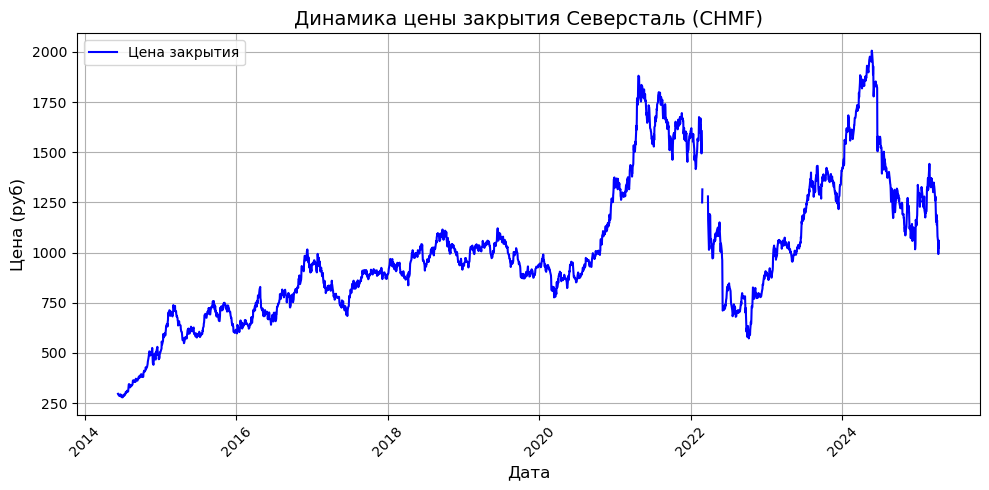

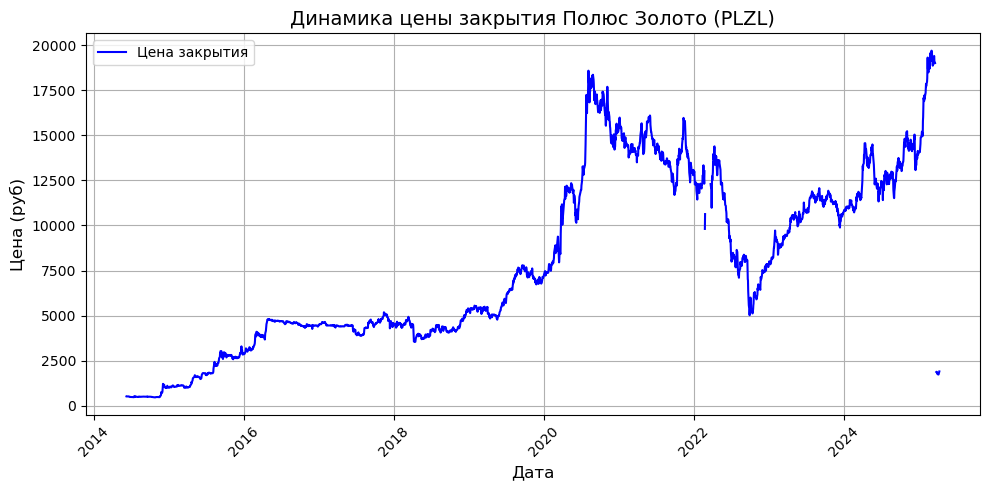

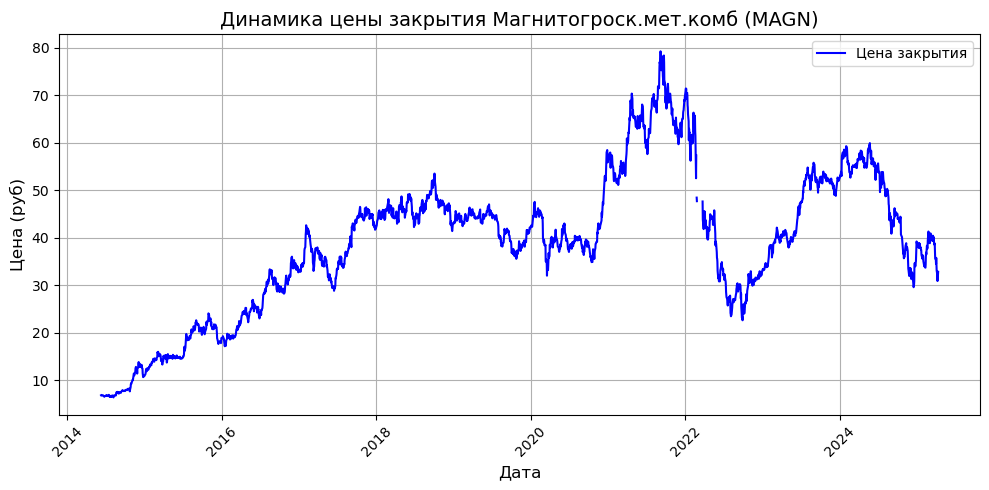

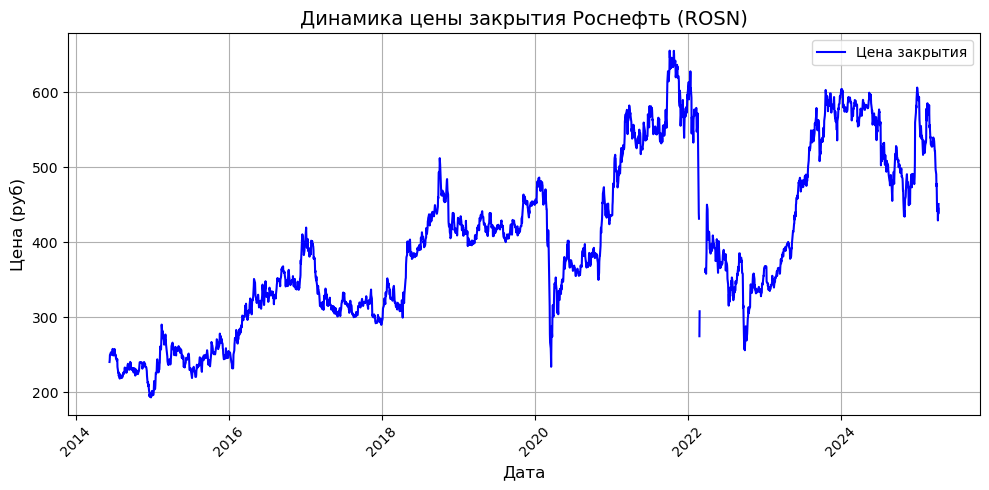

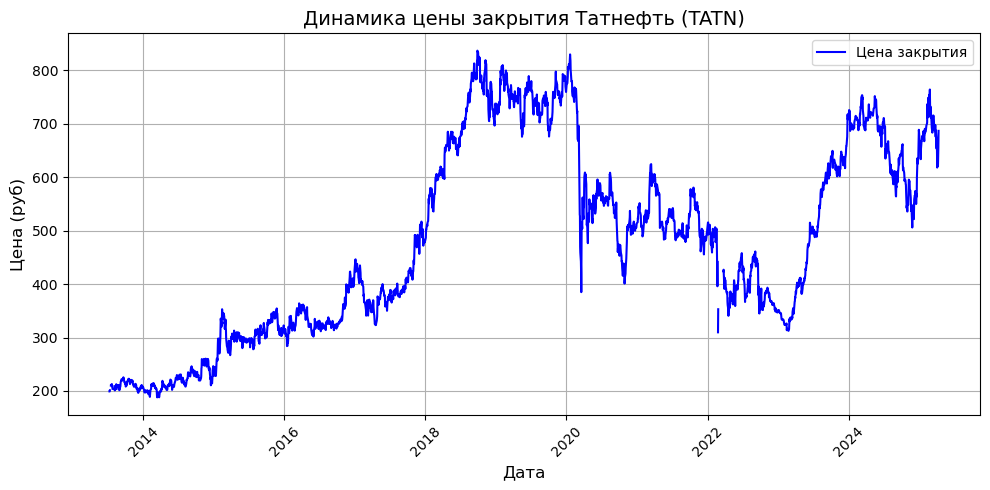

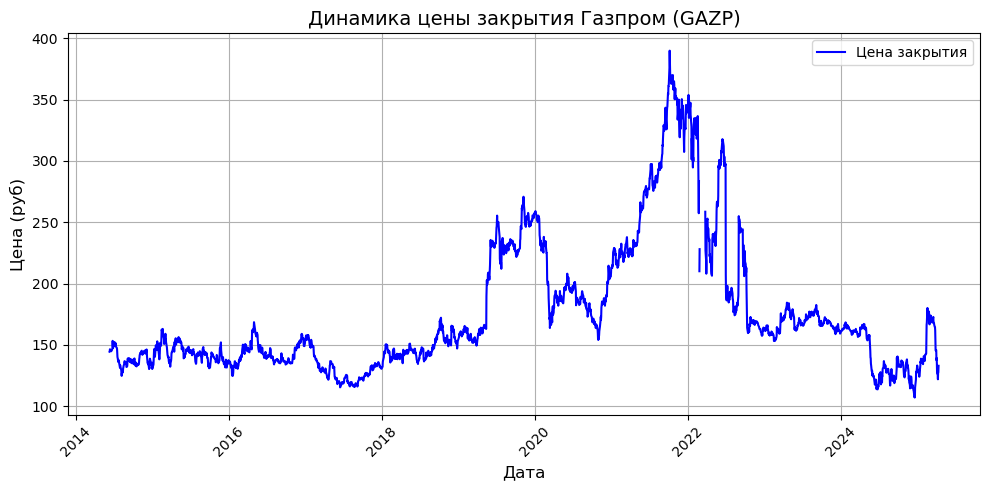

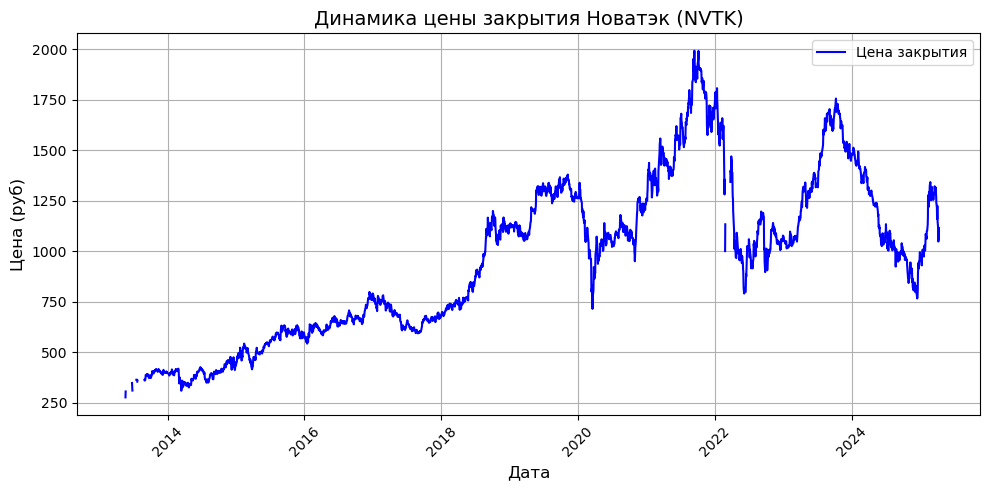

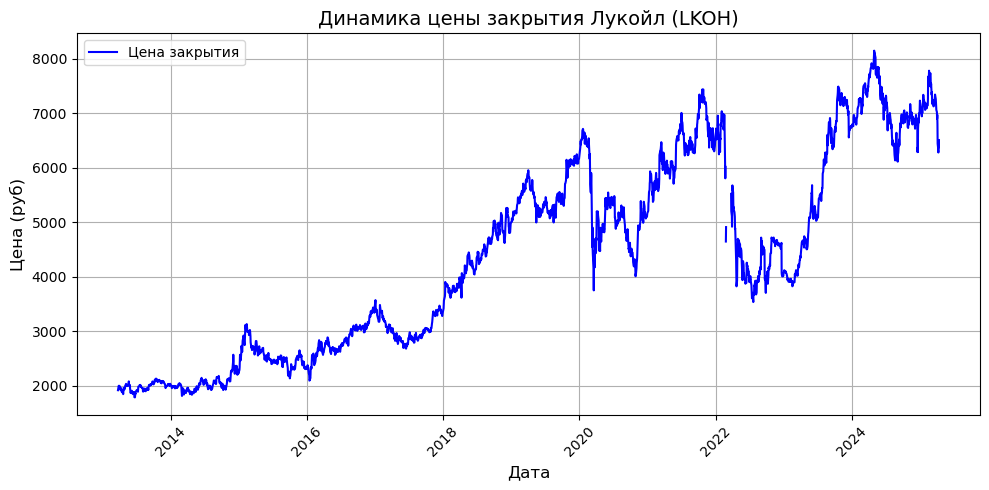

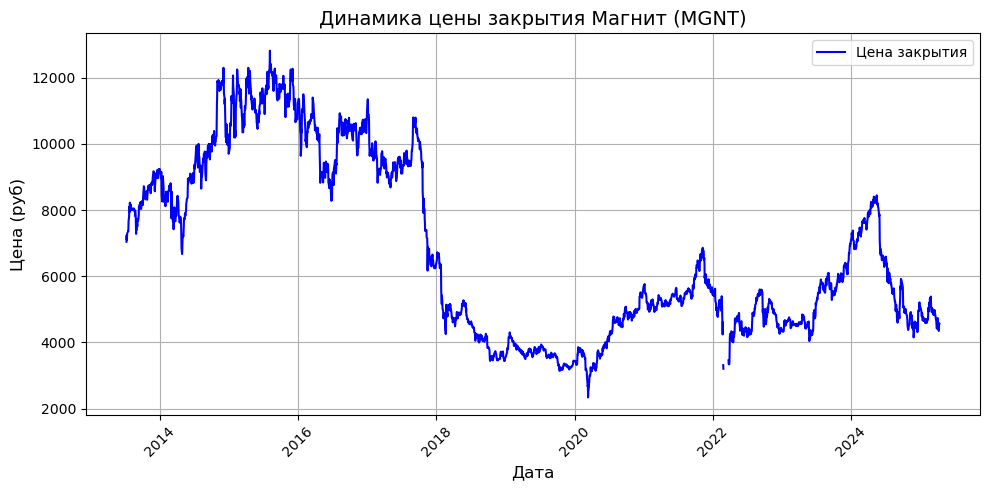

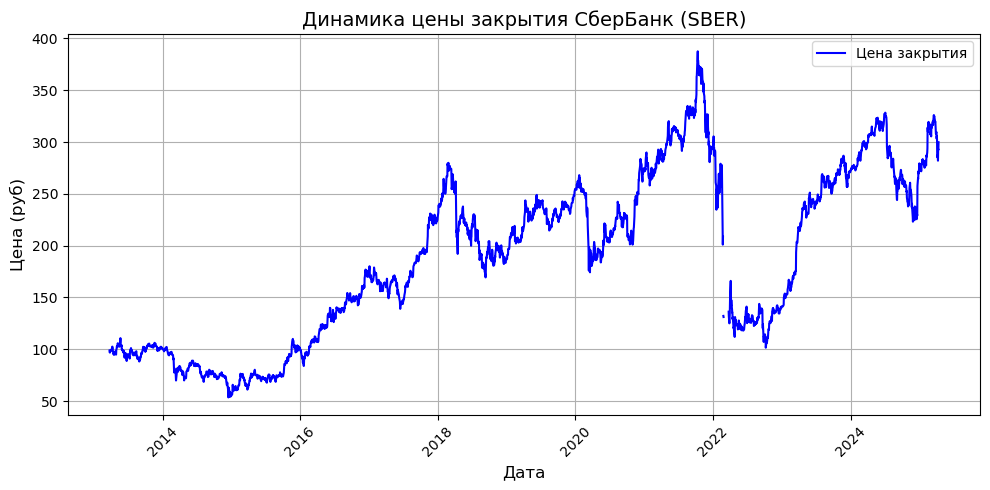

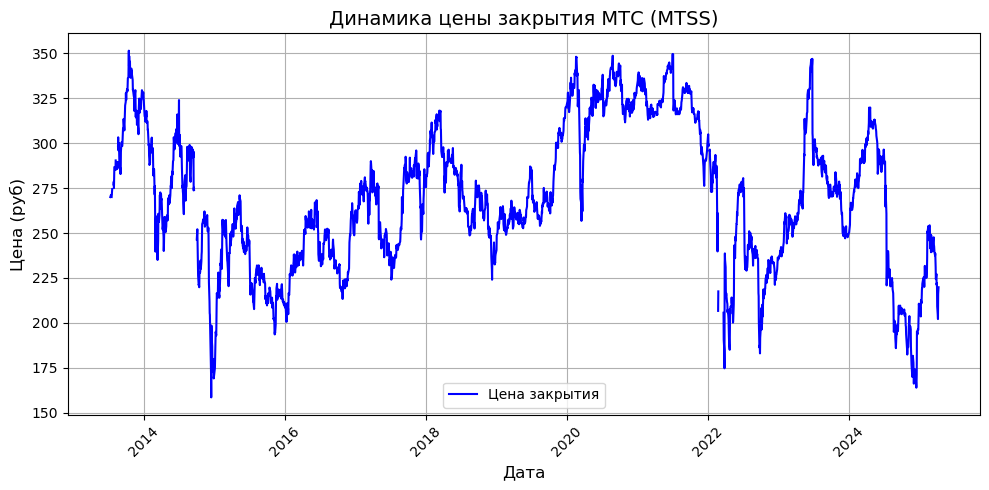

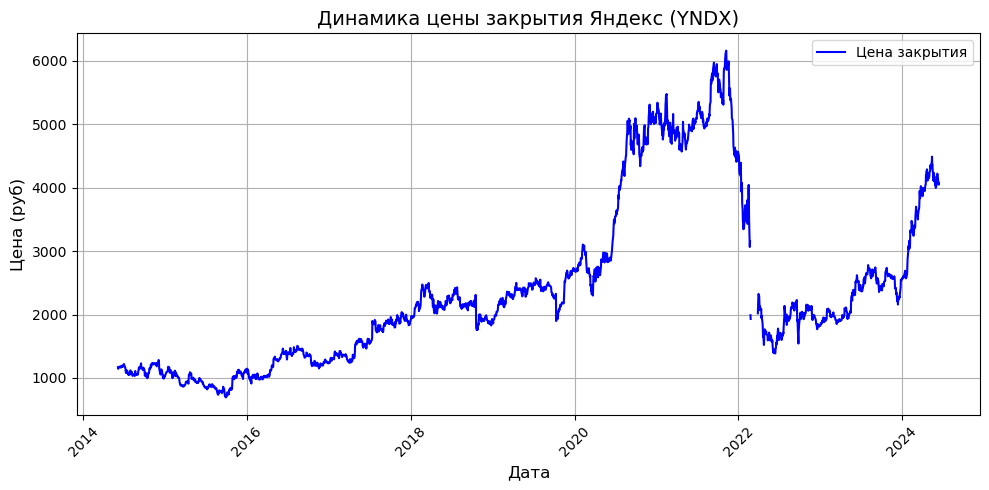

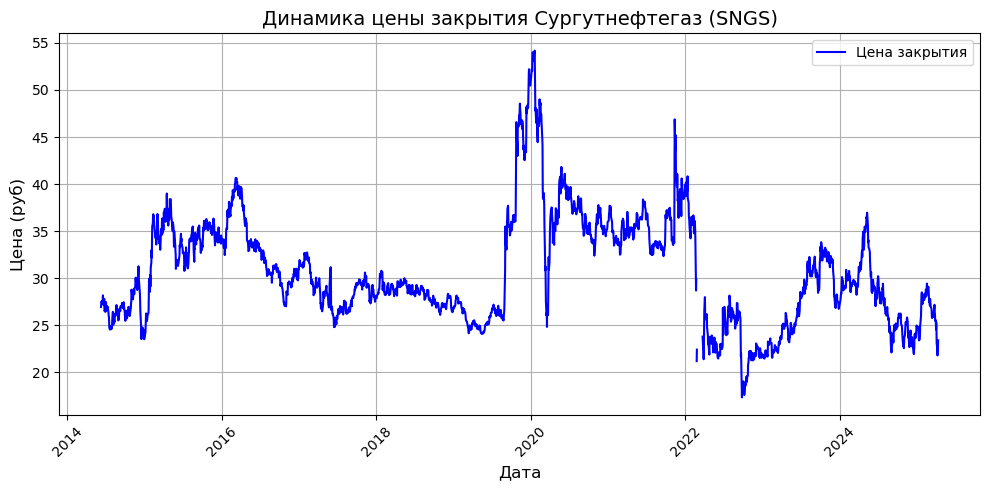

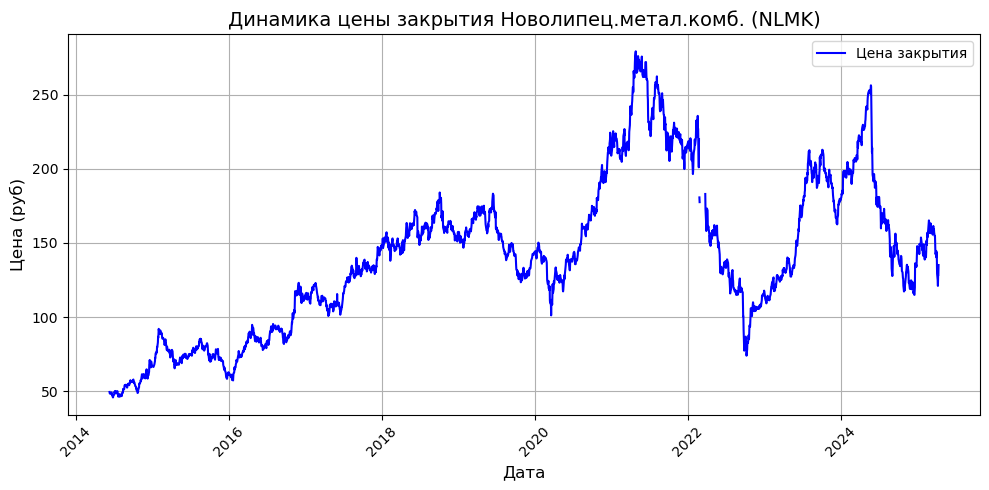

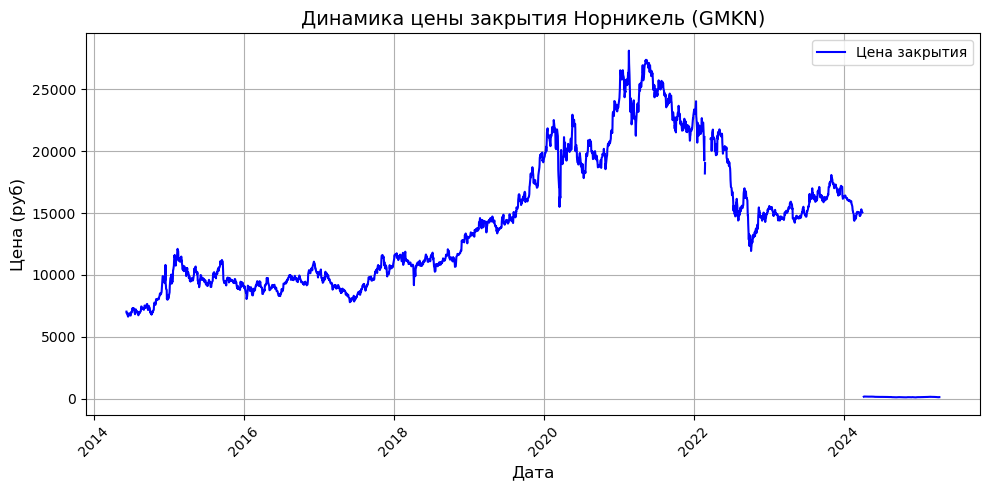

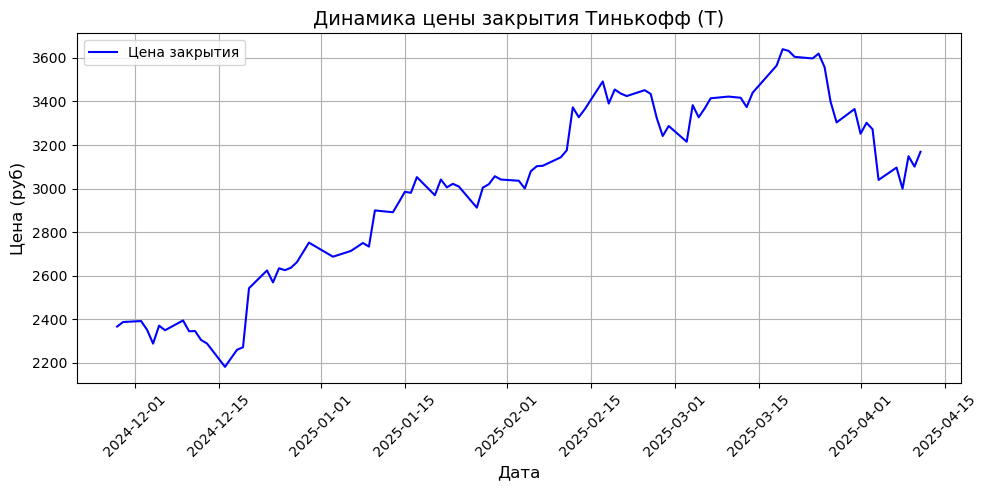

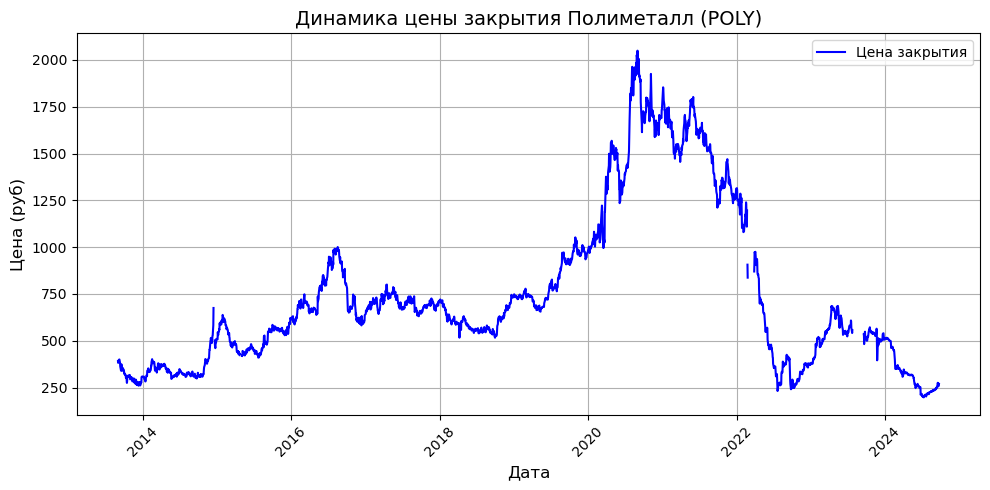

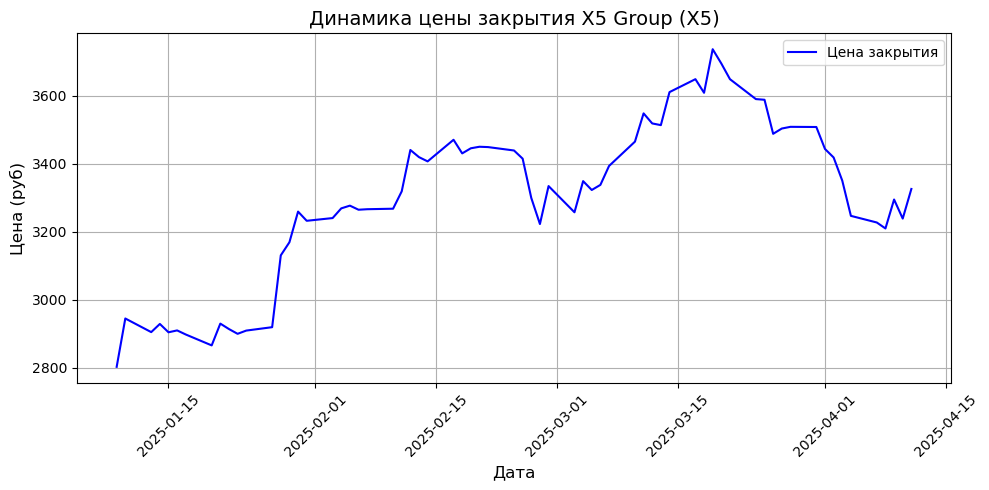

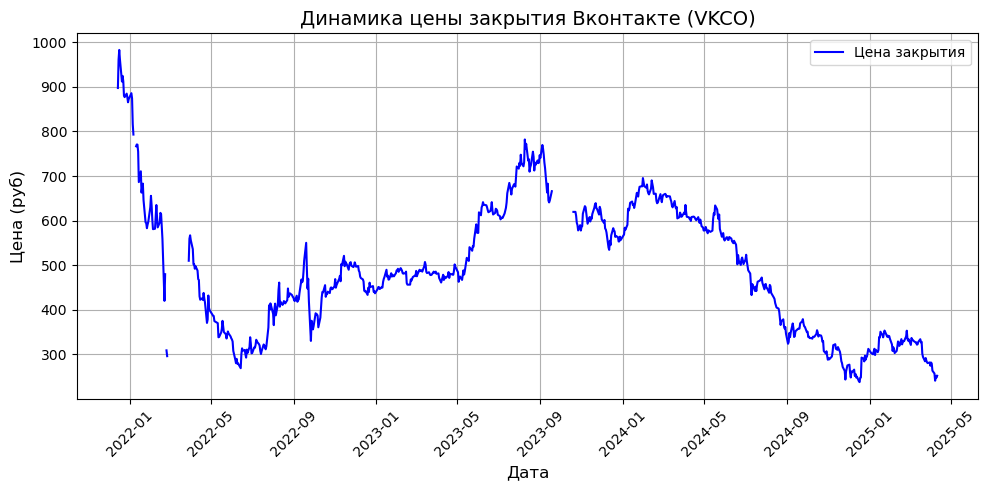

In [12]:
for i in tickets:
    df = pd.read_csv(f"datasets/{i}.csv")
    make_figure(df, i)